<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/Segmentation_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import cv2
import imutils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow

In [3]:
cha3b = os.path.join('/content/drive/My Drive/','cha3b.pdf')
elhayatalarabiya = os.path.join('/content/drive/My Drive/', 'elhayatalarabiya.pdf')
assabah = os.path.join('/content/drive/My Drive/', 'assabah.pdf')

In [7]:
#verification
for dirname, _, filenames in os.walk(assabah):
    for filename in filenames:
        print(os.path.join(dirname, filename))

###Start###

In [37]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from skimage.segmentation import clear_border


def bordure_img(path) :
  lis = []
  jour_l = []
  for fname in os.listdir(path):
      fpath = os.path.join(path, fname)
      print(fpath)
      if fpath.endswith("png") or fpath.endswith("jpg"): 
        img = cv2.imread(fpath)
        #Extract only blue channel as DAPI / nuclear (blue) staining is the best
        #channel to perform cell count.
        cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.
        pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

        #Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
        ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        # Morphological operations to remove small noise - opening
        #To remove holes we can use closing
        kernel = np.ones((3,3),np.uint8)
        opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
        opening = clear_border(opening) #Remove edge touching grains


        ### detect rectangle in image and crop
        h, w = opening.shape[:2]
        kernel = np.ones((15,15),np.uint8)

        e = cv2.erode(opening,kernel,iterations = 2)  
        d = cv2.dilate(e,kernel,iterations = 1)
        ret, th = cv2.threshold(d, 150, 255, cv2.THRESH_BINARY_INV)

        mask = np.zeros((h+2, w+2), np.uint8)
        cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
        out = cv2.bitwise_not(th)
        out= cv2.dilate(out,kernel,iterations = 3)
        cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        for i in range(len(cnt)):
                    area = cv2.contourArea(cnt[i])
                    if(area>10000 ): #and area<100000):
                          mask = np.zeros_like(opening)
                          cv2.drawContours(mask, cnt, i, 255, -1)
                          x,y,w,h = cv2.boundingRect(cnt[i])
                          crop= img[ y:h+y,x:w+x]
                          lis.append(crop)


        jour_l.append(opening)
  print(len(lis))
  return lis , jour_l

lis, jour_l = bordure_img("/content/drive/MyDrive/ImagesFromPDF/")

/content/drive/MyDrive/ImagesFromPDF/0001.jpg
/content/drive/MyDrive/ImagesFromPDF/0002.jpg
/content/drive/MyDrive/ImagesFromPDF/0003.jpg
/content/drive/MyDrive/ImagesFromPDF/0004.jpg
/content/drive/MyDrive/ImagesFromPDF/0005.jpg
/content/drive/MyDrive/ImagesFromPDF/0006.jpg
/content/drive/MyDrive/ImagesFromPDF/0007.jpg
/content/drive/MyDrive/ImagesFromPDF/0008.jpg
/content/drive/MyDrive/ImagesFromPDF/0009.jpg
/content/drive/MyDrive/ImagesFromPDF/0010.jpg
/content/drive/MyDrive/ImagesFromPDF/0011.jpg
/content/drive/MyDrive/ImagesFromPDF/0012.jpg
/content/drive/MyDrive/ImagesFromPDF/0013.jpg
/content/drive/MyDrive/ImagesFromPDF/0014.jpg
/content/drive/MyDrive/ImagesFromPDF/0015.jpg
/content/drive/MyDrive/ImagesFromPDF/0016.jpg
/content/drive/MyDrive/ImagesFromPDF/.ipynb_checkpoints
325


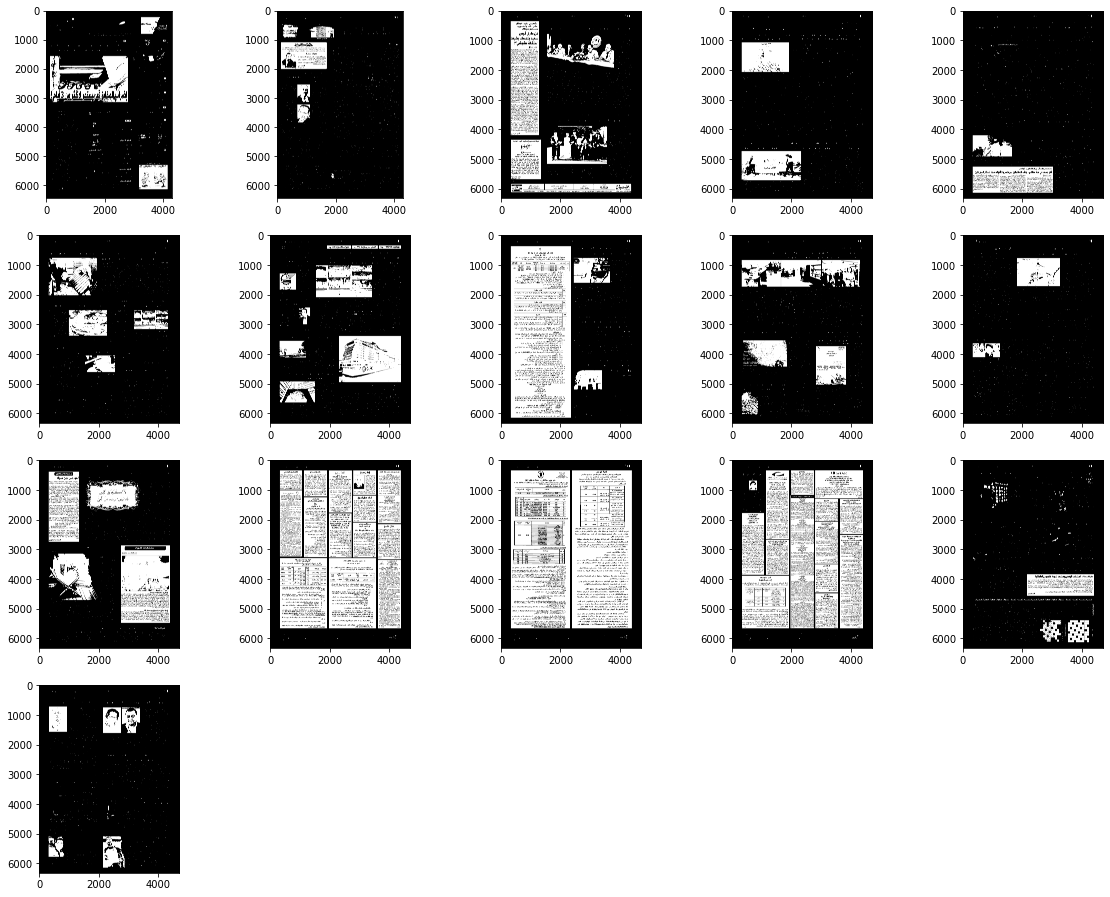

In [40]:
plt.figure(figsize=(20,20))
for i in range(len(jour_l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid
    plt.imshow(jour_l[i], cmap='gray')
plt.show()
#plt.imshow(image)

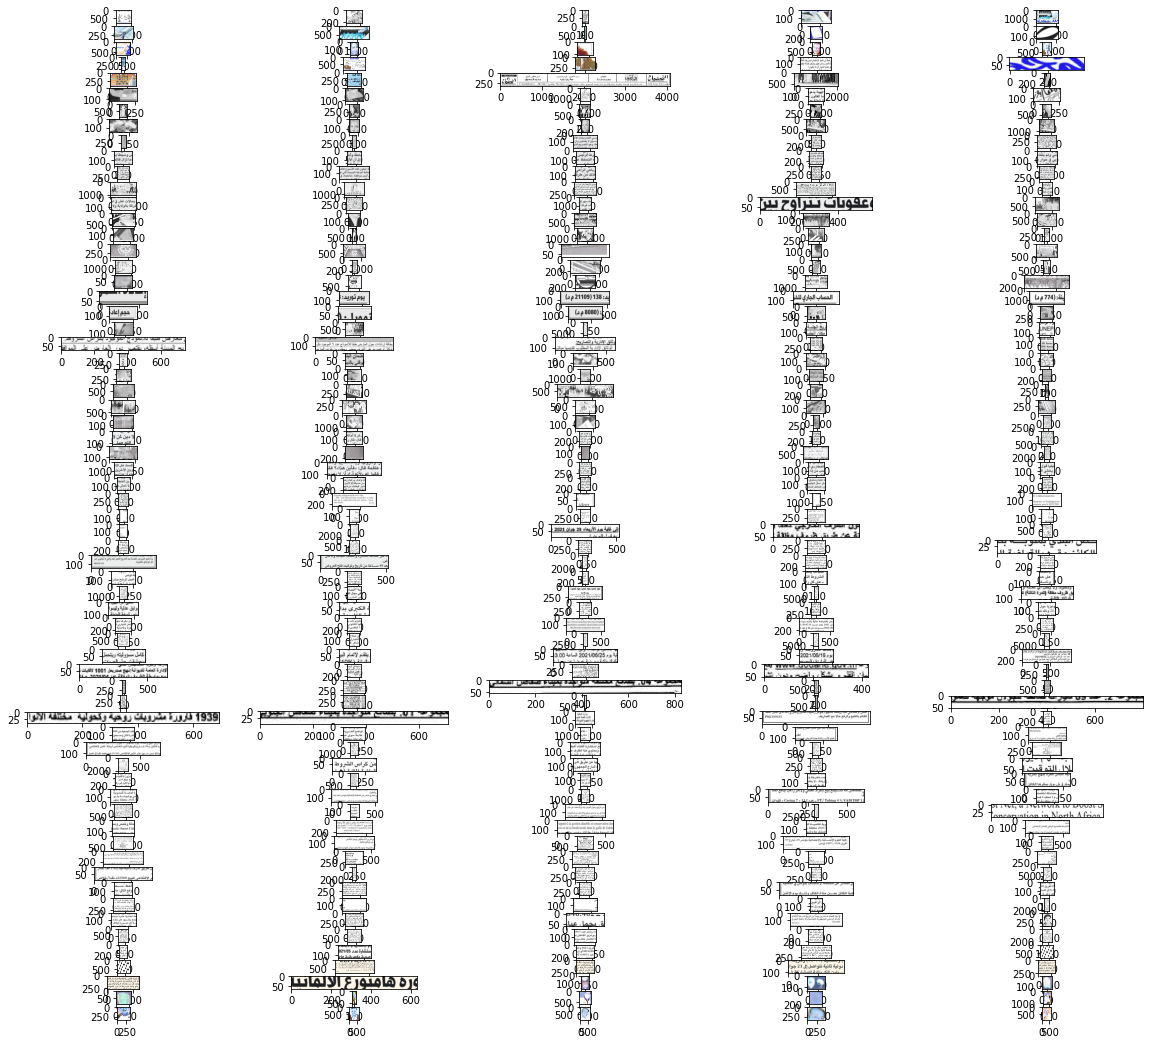

In [39]:
plt.figure(figsize=(20,20))
for i in range(len(lis)):
    plt.subplot(70,5,i+1)    # the number of images in the grid
    plt.imshow(lis[i], cmap='gray')
plt.show()
#plt.imshow(image)